# Model Train and Evaluation: Support Vector Machine
## Azure Machine Learning designer module: Two class support vector machine
- https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-module-reference/two-class-support-vector-machine

Analysis:
============
- **Azure Designer Performance metrics are different with locally trained.**


## Contents

1.	[Load prereqs and data](#prereqs)
2.  [Exploratory Data Analysis](#eda)
2.  [Data scale, Train and evaluate a baseline classifier](#classifier)

<a id="prereqs"></a>
## 1. Load prereqs and data

In [2]:
%reload_ext watermark
%watermark

2020-11-25T23:29:29+01:00

CPython 3.8.3
IPython 7.19.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 37 Stepping 5, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [5]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt

#### Load dataset

In [6]:
COLUMNS = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                 "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                 "hours-per-week", "native-country", "income"]
# PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# df = pd.read_csv(PATH, header=None, index_col=None, names = COLUMNS)

df = pd.read_csv('./data/adult.csv', index_col=None)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.loc[:, ~df.columns.isin(['workclass','occupation','native-country'])]
new_df.loc[:,'education'] = le.fit_transform(new_df.loc[:,'education'].values)
new_df.loc[:,'marital-status'] = le.fit_transform(new_df.loc[:,'marital-status'].values)
new_df.loc[:,'relationship'] = le.fit_transform(new_df.loc[:,'relationship'].values)
new_df.loc[:,'race'] = le.fit_transform(new_df.loc[:,'race'].values)
new_df.loc[:,'sex'] = le.fit_transform(new_df.loc[:,'sex'].values)
new_df.loc[:,'income'] = le.fit_transform(new_df.loc[:,'income'].values)


In [8]:
new_df.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,77516,9,13,4,1,4,1,2174,0,40,0
1,50,83311,9,13,2,0,4,1,0,0,13,0
2,38,215646,11,9,0,1,4,1,0,0,40,0
3,53,234721,1,7,2,0,2,1,0,0,40,0
4,28,338409,9,13,2,5,2,0,0,0,40,0


In [11]:
X = new_df.drop('income', axis=1).values
y = new_df['income'].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,shuffle=True)

In [17]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (22792, 11)
y_train.shape: (22792,)
X_test.shape: (9769, 11)
y_test.shape: (9769,)


<a id="classifier"></a>
## 3. Preprocess ,Train and Evaluate a classifier

1. [Data Scaling](#3_1)
2. [Model Training: Fit SVM Model (sklearn)](#3_2)
3. [Evaluate the model](#3_3)

<a id="3_1"></a>
### 3.1. Data Scaling

Bringing features onto the same scale

<a id="3_2"></a>
### 3.2 Training a SVM via scikit-learn
Train a model using 

In [17]:
# using Support Vector Machines
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

MODEL = 'SVC'
model = make_pipeline(StandardScaler(), 
                      SVC(kernel = 'rbf', C = 0.001, probability = True, max_iter = 1000, random_state = 42))

model.fit(X_train, y_train)
print(f"model: {model}")

import sklearn
print(f"sklearn.version:{sklearn.__version__}")

model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.001, max_iter=1000, probability=True,
                     random_state=42))])
sklearn.version:0.23.2


<a id="2_3"></a>
## 4. Evaluate the model

Looking at different performance evaluation metrics

In [18]:
# Import the libraries
from sklearn import metrics

# using threshold
threshold = 0.5 # set threshold as 0.5
y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(int) 
print(f"y_pred: {y_pred}")

print(f'Misclassified examples:{(y_test != y_pred).sum()}')

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(f"confusion matrix:\n {conf_mat}")

# AUC
auc = metrics.roc_auc_score(y_test, y_pred)
print(f"auc: {auc}")

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") 

# Precision
precision = metrics.precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = metrics.recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1
f1 = metrics.f1_score(y_test, y_pred)
print(f"F1: {f1}")

# classification_report
print('classification_report')
print(metrics.classification_report(y_test, y_pred))

y_pred: [0 0 0 ... 0 0 1]
Misclassified examples:2172
confusion matrix:
 [[7427   28]
 [2144  170]]
auc: 0.5348549957190565
Accuracy: 0.7776640393080152
Precision: 0.8585858585858586
Recall: 0.07346585998271392
F1: 0.13535031847133758
classification_report
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7455
           1       0.86      0.07      0.14      2314

    accuracy                           0.78      9769
   macro avg       0.82      0.53      0.50      9769
weighted avg       0.80      0.78      0.70      9769



In [20]:
import joblib
joblib.dump(model, f"models/local/adult/{MODEL}.pkl")

['models/local/adult/SVC.pkl']

## 4. Result comparison

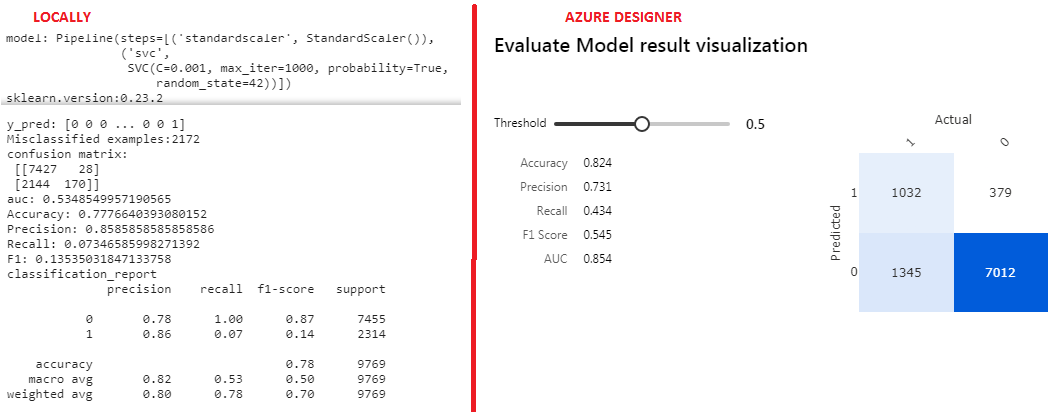

In [78]:
Image(filename='images/Azure/Exp-2/SVC/result2.png')

## 5 Designer

https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-module-reference/two-class-support-vector-machine

#### Option 1

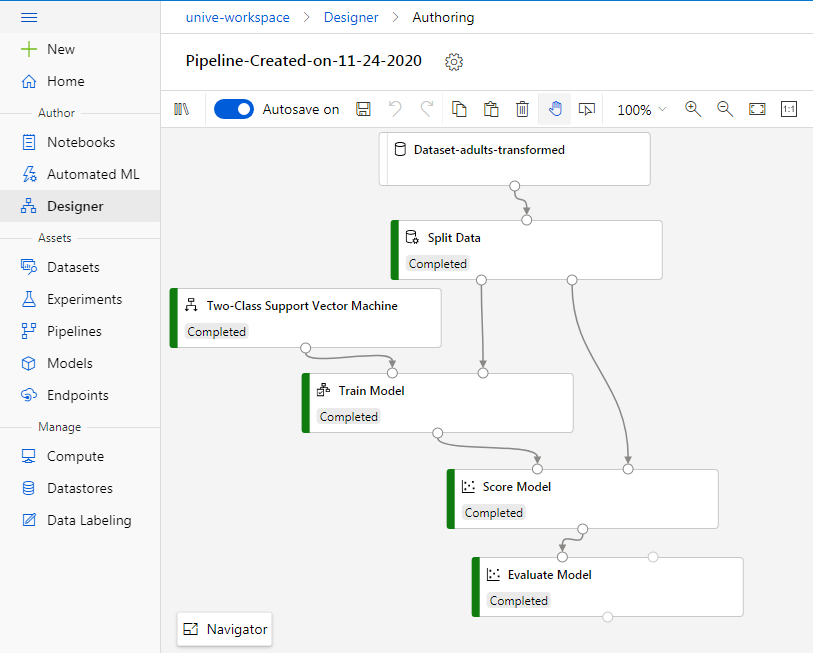

In [24]:
from IPython.display import Image
Image(filename='images/Azure/Exp-2/SVC/0-pipeline.png')

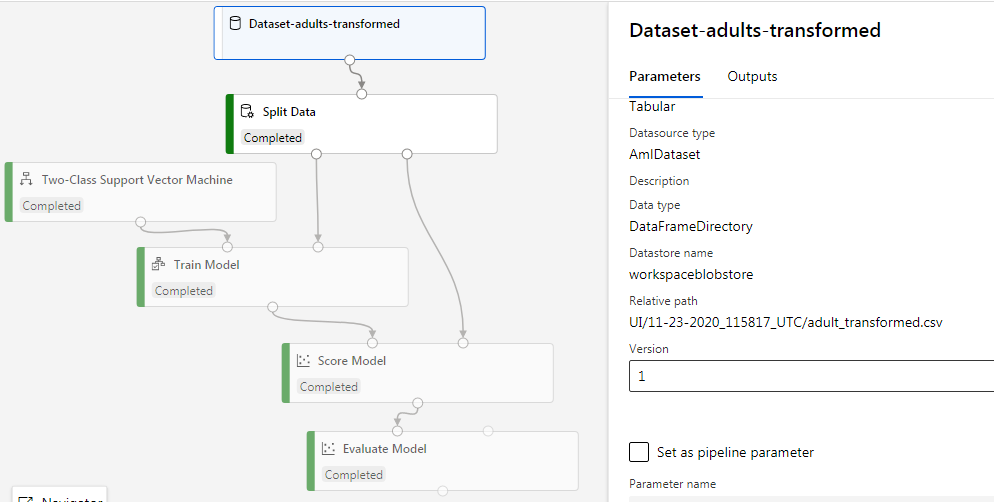

In [25]:
Image(filename='images/Azure/Exp-2/SVC/1-dataset.png')

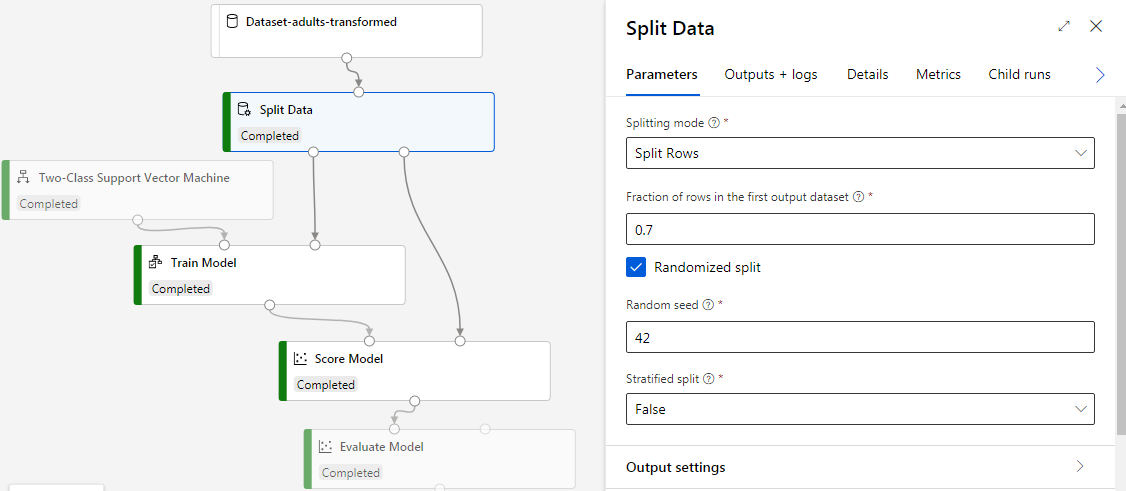

In [26]:
Image(filename='images/Azure/Exp-2/SVC/2-split.png')

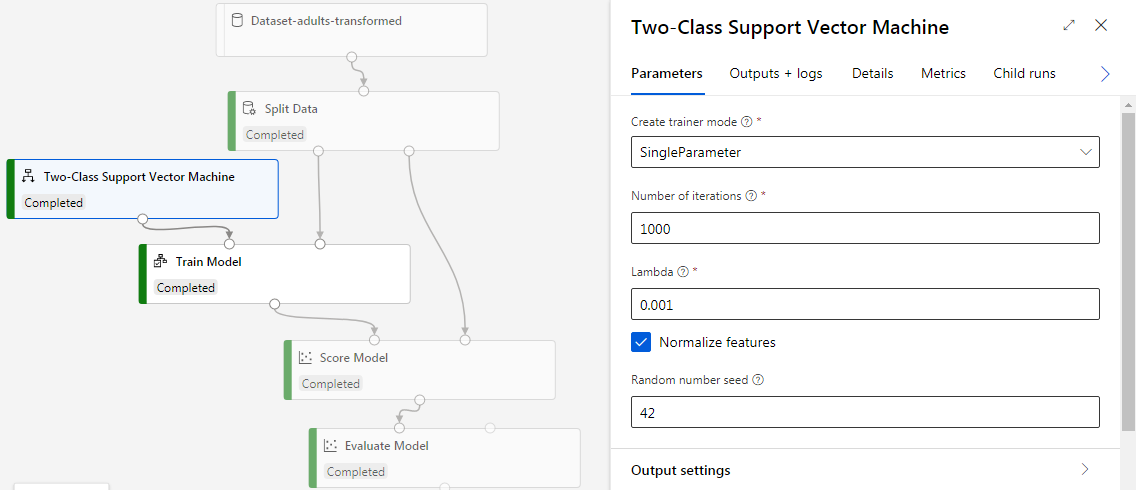

In [27]:
Image(filename='images/Azure/Exp-2/SVC/3-classify.png')

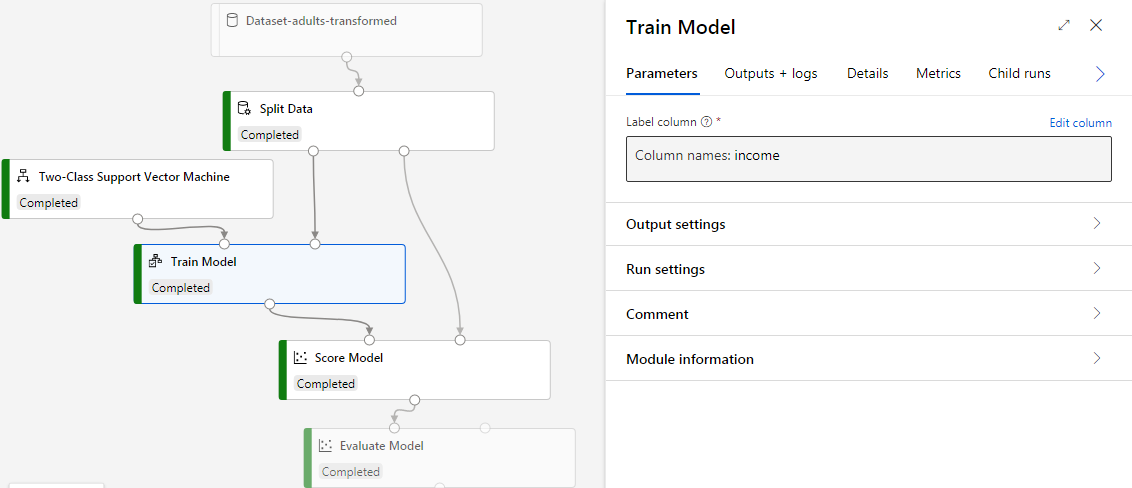

In [28]:
Image(filename='images/Azure/Exp-2/SVC/4-train-model.png')

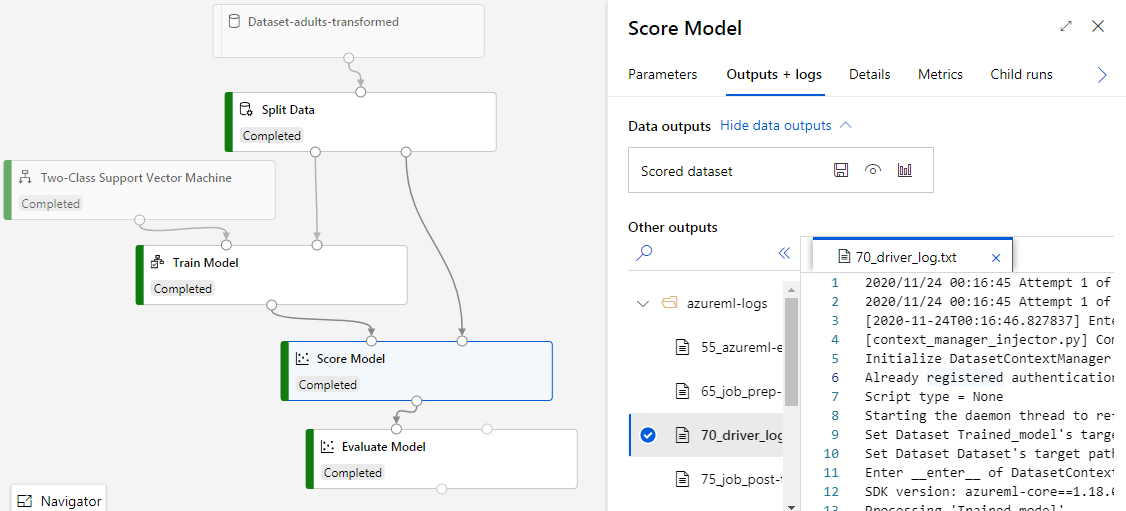

In [29]:
Image(filename='images/Azure/Exp-2/SVC/5-score-model.png')

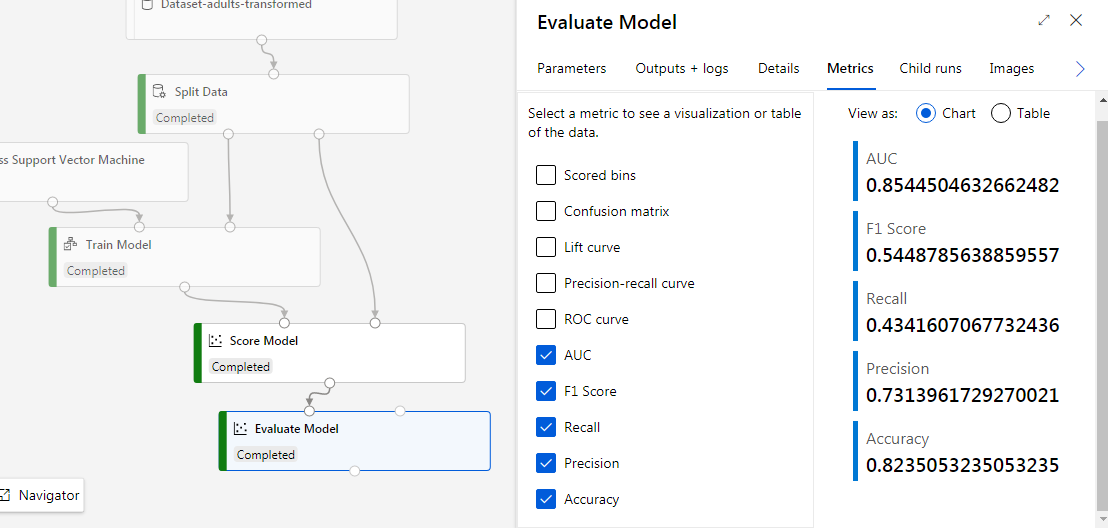

In [30]:
Image(filename='images/Azure/Exp-2/SVC/6-evaluate-model.png')

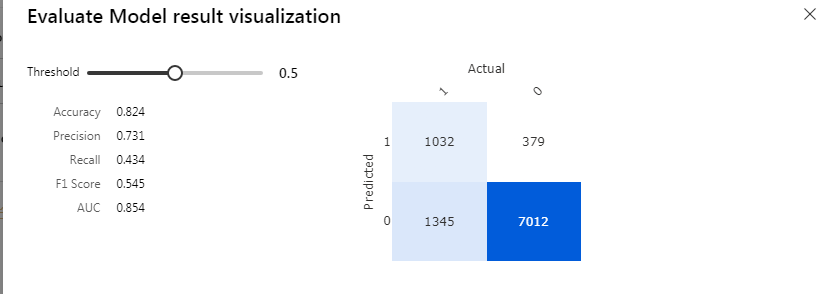

In [31]:
Image(filename='images/Azure/Exp-2/SVC/designer-metrics.png')

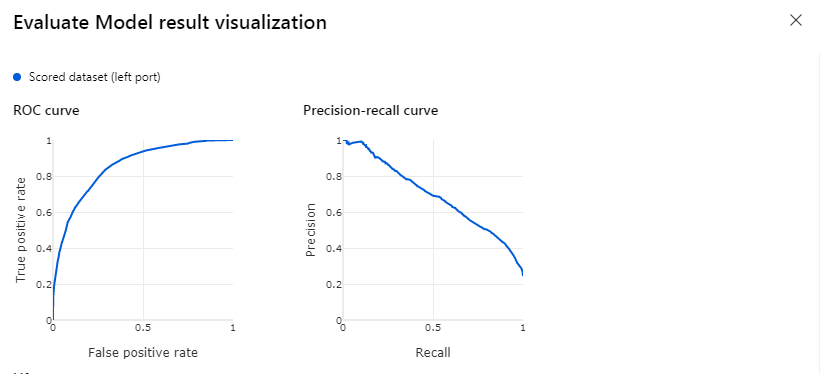

In [32]:
Image(filename='images/Azure/Exp-2/SVC/designer-metrics-2.png')

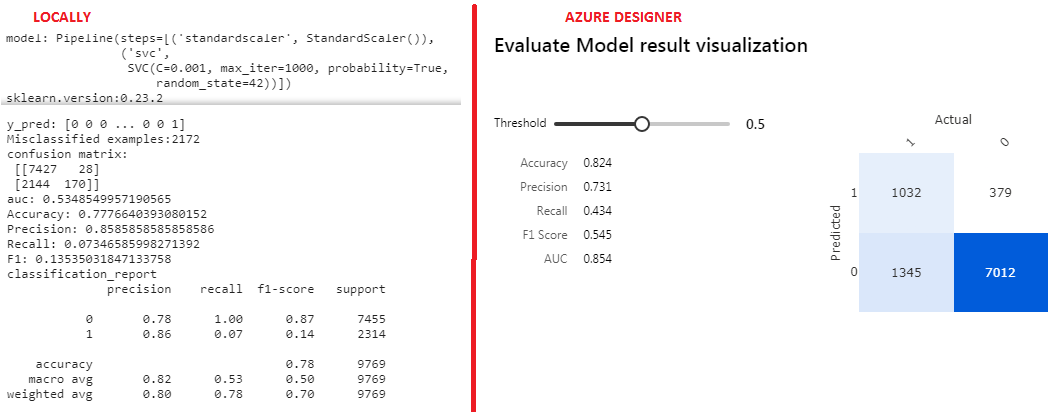

In [33]:
Image(filename='images/Azure/Exp-2/SVC/result2.png')

#### Option 2

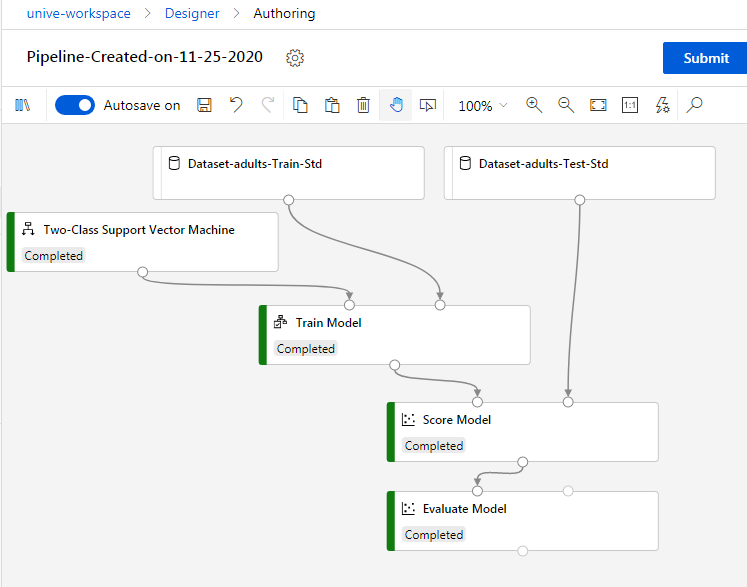

In [34]:
Image(filename='images/Azure/Exp-2/SVC/opt2/0-pipeline.png')

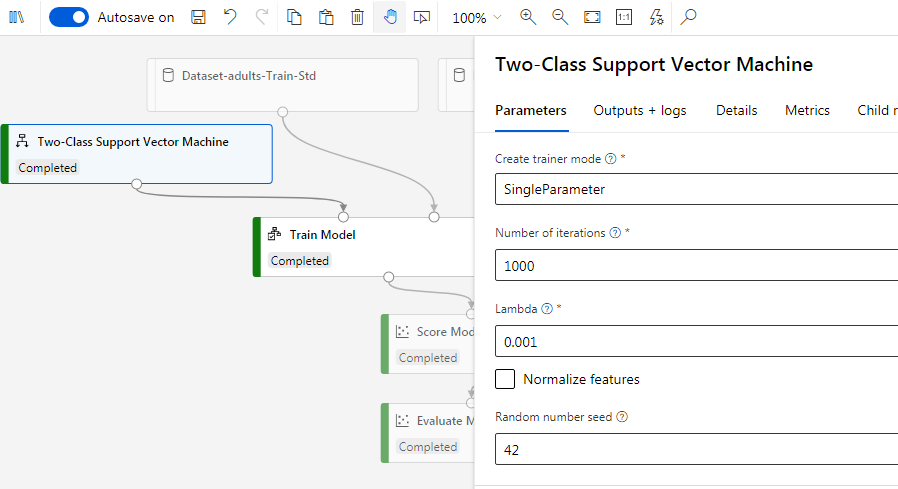

In [35]:
Image(filename='images/Azure/Exp-2/SVC/opt2/1-classfier.png')

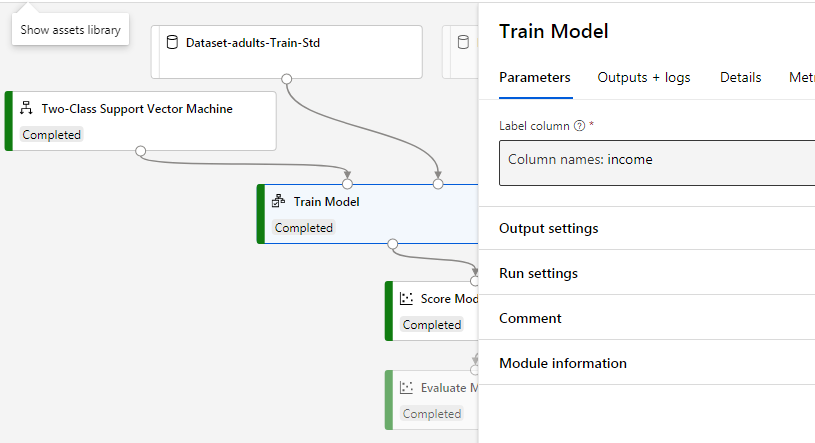

In [36]:
Image(filename='images/Azure/Exp-2/SVC/opt2/2-train.png')

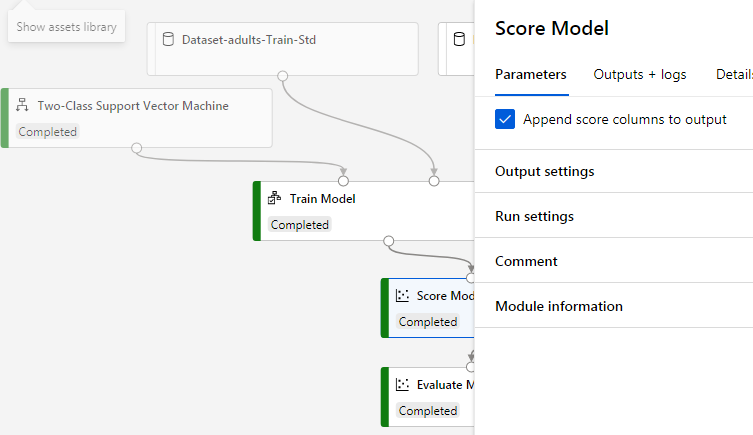

In [37]:
Image(filename='images/Azure/Exp-2/SVC/opt2/3-score.png')

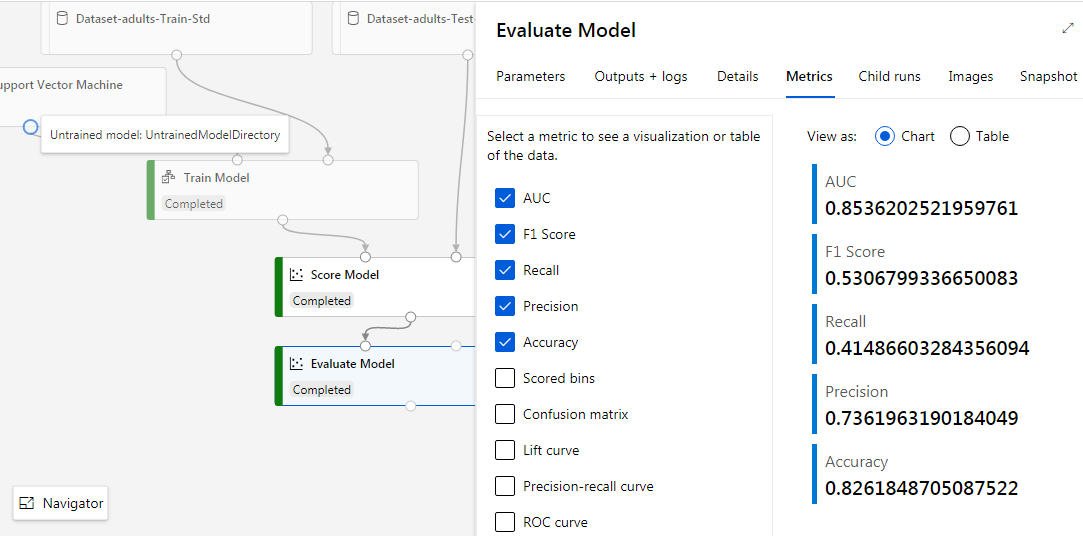

In [38]:
Image(filename='images/Azure/Exp-2/SVC/opt2/4-evaluate.png')

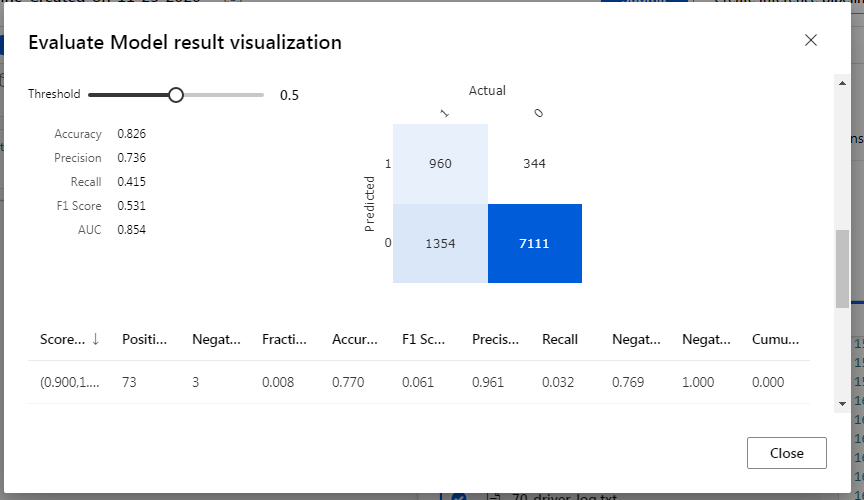

In [39]:
Image(filename='images/Azure/Exp-2/SVC/opt2/5-visual-1.png')

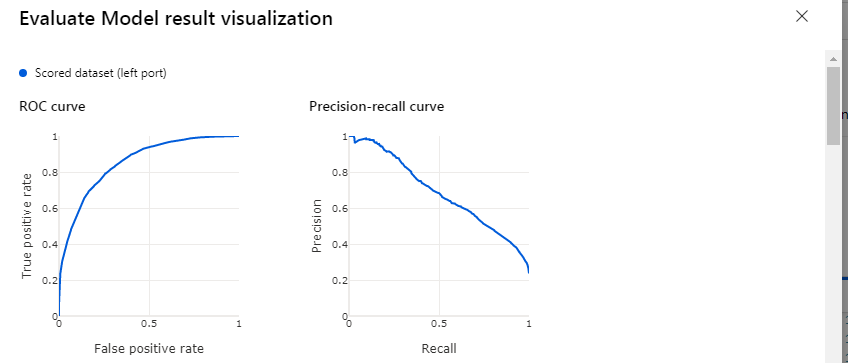

In [40]:
Image(filename='images/Azure/Exp-2/SVC/opt2/5-visual-2.png')

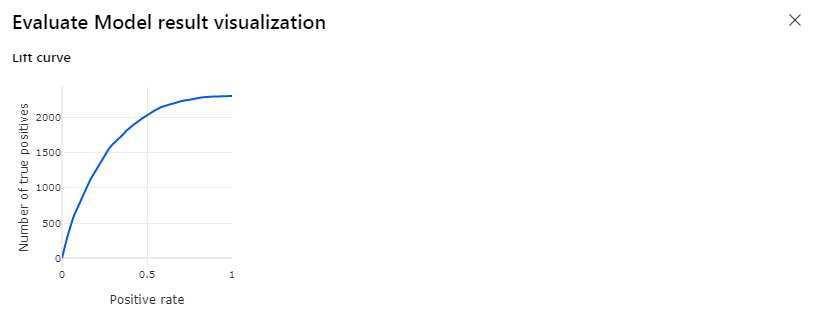

In [41]:
Image(filename='images/Azure/Exp-2/SVC/opt2/5-visual-3.png')

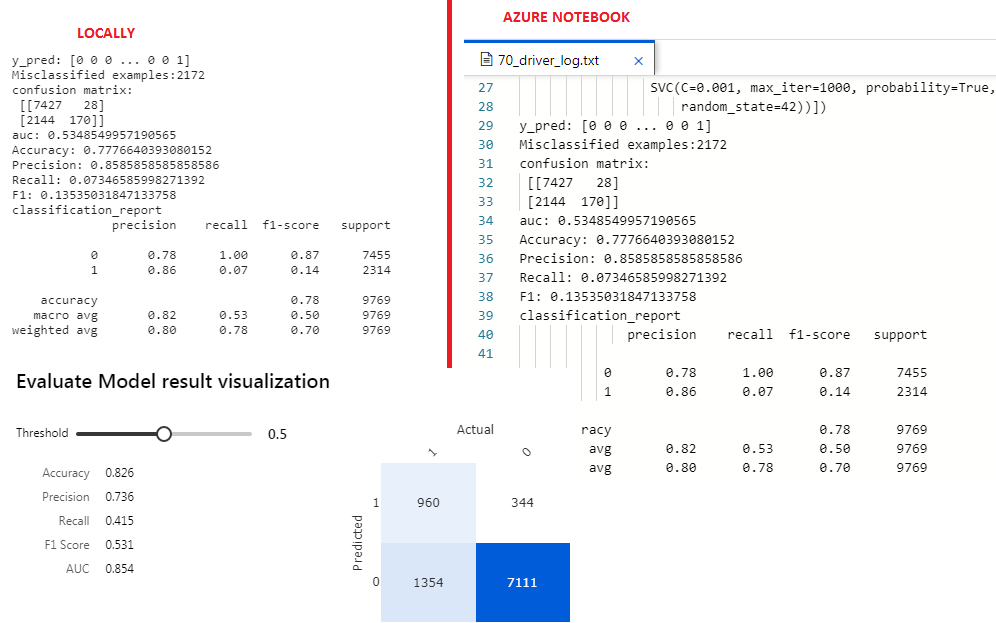

In [42]:
Image(filename='images/Azure/Exp-2/SVC/opt2/result.png')